# Assignmnet 12
# Naive Bayes

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 2500x1250 with 0 Axes>

In [10]:
sd_train=pd.read_csv('/content/SalaryData_Train.csv')
sd_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
sd_test=pd.read_csv('/content/SalaryData_Test.csv')
sd_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


EDA in train Dataset

In [12]:
sd_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
sd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [14]:
sd_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
def uni(df):
  for i in range(len(df.columns)):
    print('\n All unique Value in '+ str(df.columns[i]))
    print(np.sort(df[df.columns[i]].unique()))
    print('Total no of unique values ' +
          str(len(df[df.columns[i]].unique())))

In [16]:
uni(sd_train)


 All unique Value in age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 90]
Total no of unique values 72

 All unique Value in workclass
[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
Total no of unique values 7

 All unique Value in education
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
Total no of unique values 16

 All unique Value in educationno
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Total no of unique values 16

 All unique Value in maritalstatus
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
Total no of unique values 7

 All uniq

# Checking for duplicated value

In [17]:
sd_train[sd_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [18]:
sd_train.drop_duplicates(inplace=True)

In [19]:
sd_train[sd_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [20]:
sd_train.reset_index(inplace=True)
sd_train.drop(columns='index',inplace=True)

sd_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26899,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
26900,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
26901,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


visualizing the data

# Box Polt

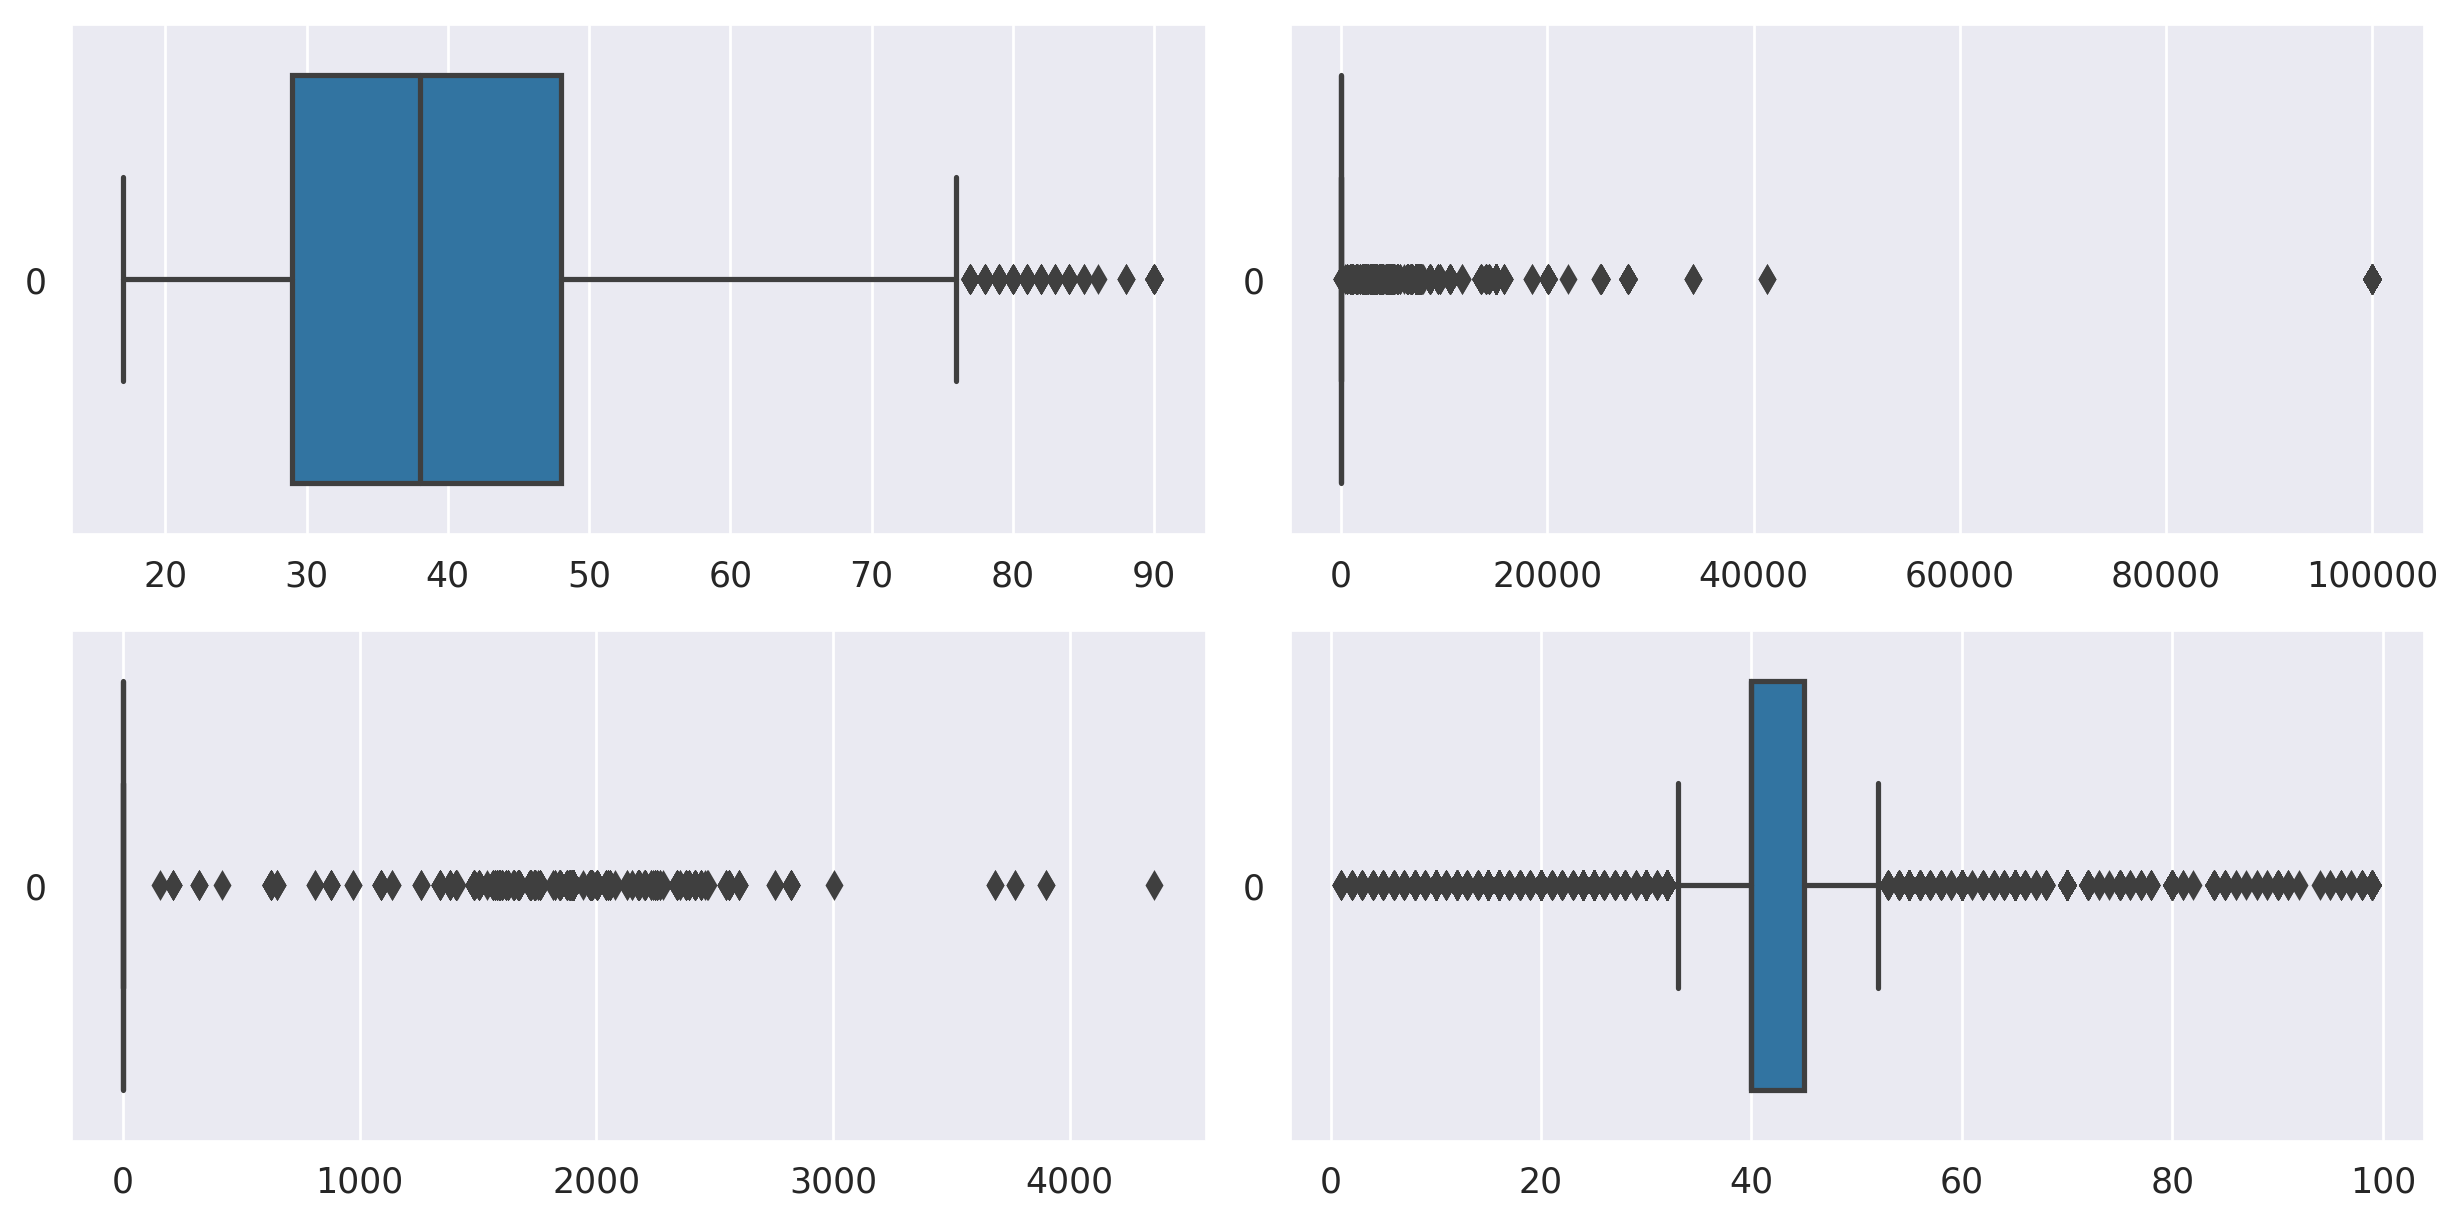

In [21]:
fig,ax=plt.subplots(2,2)

sns.boxplot(sd_train['age'],ax=ax[0,0],orient='h')
sns.boxplot(sd_train['capitalgain'],ax=ax[0,1],orient='h')
sns.boxplot(sd_train['capitalloss'],ax=ax[1,0],orient='h')
sns.boxplot(sd_train['hoursperweek'],ax=ax[1,1],orient='h')

plt.tight_layout()

# Histogram plot

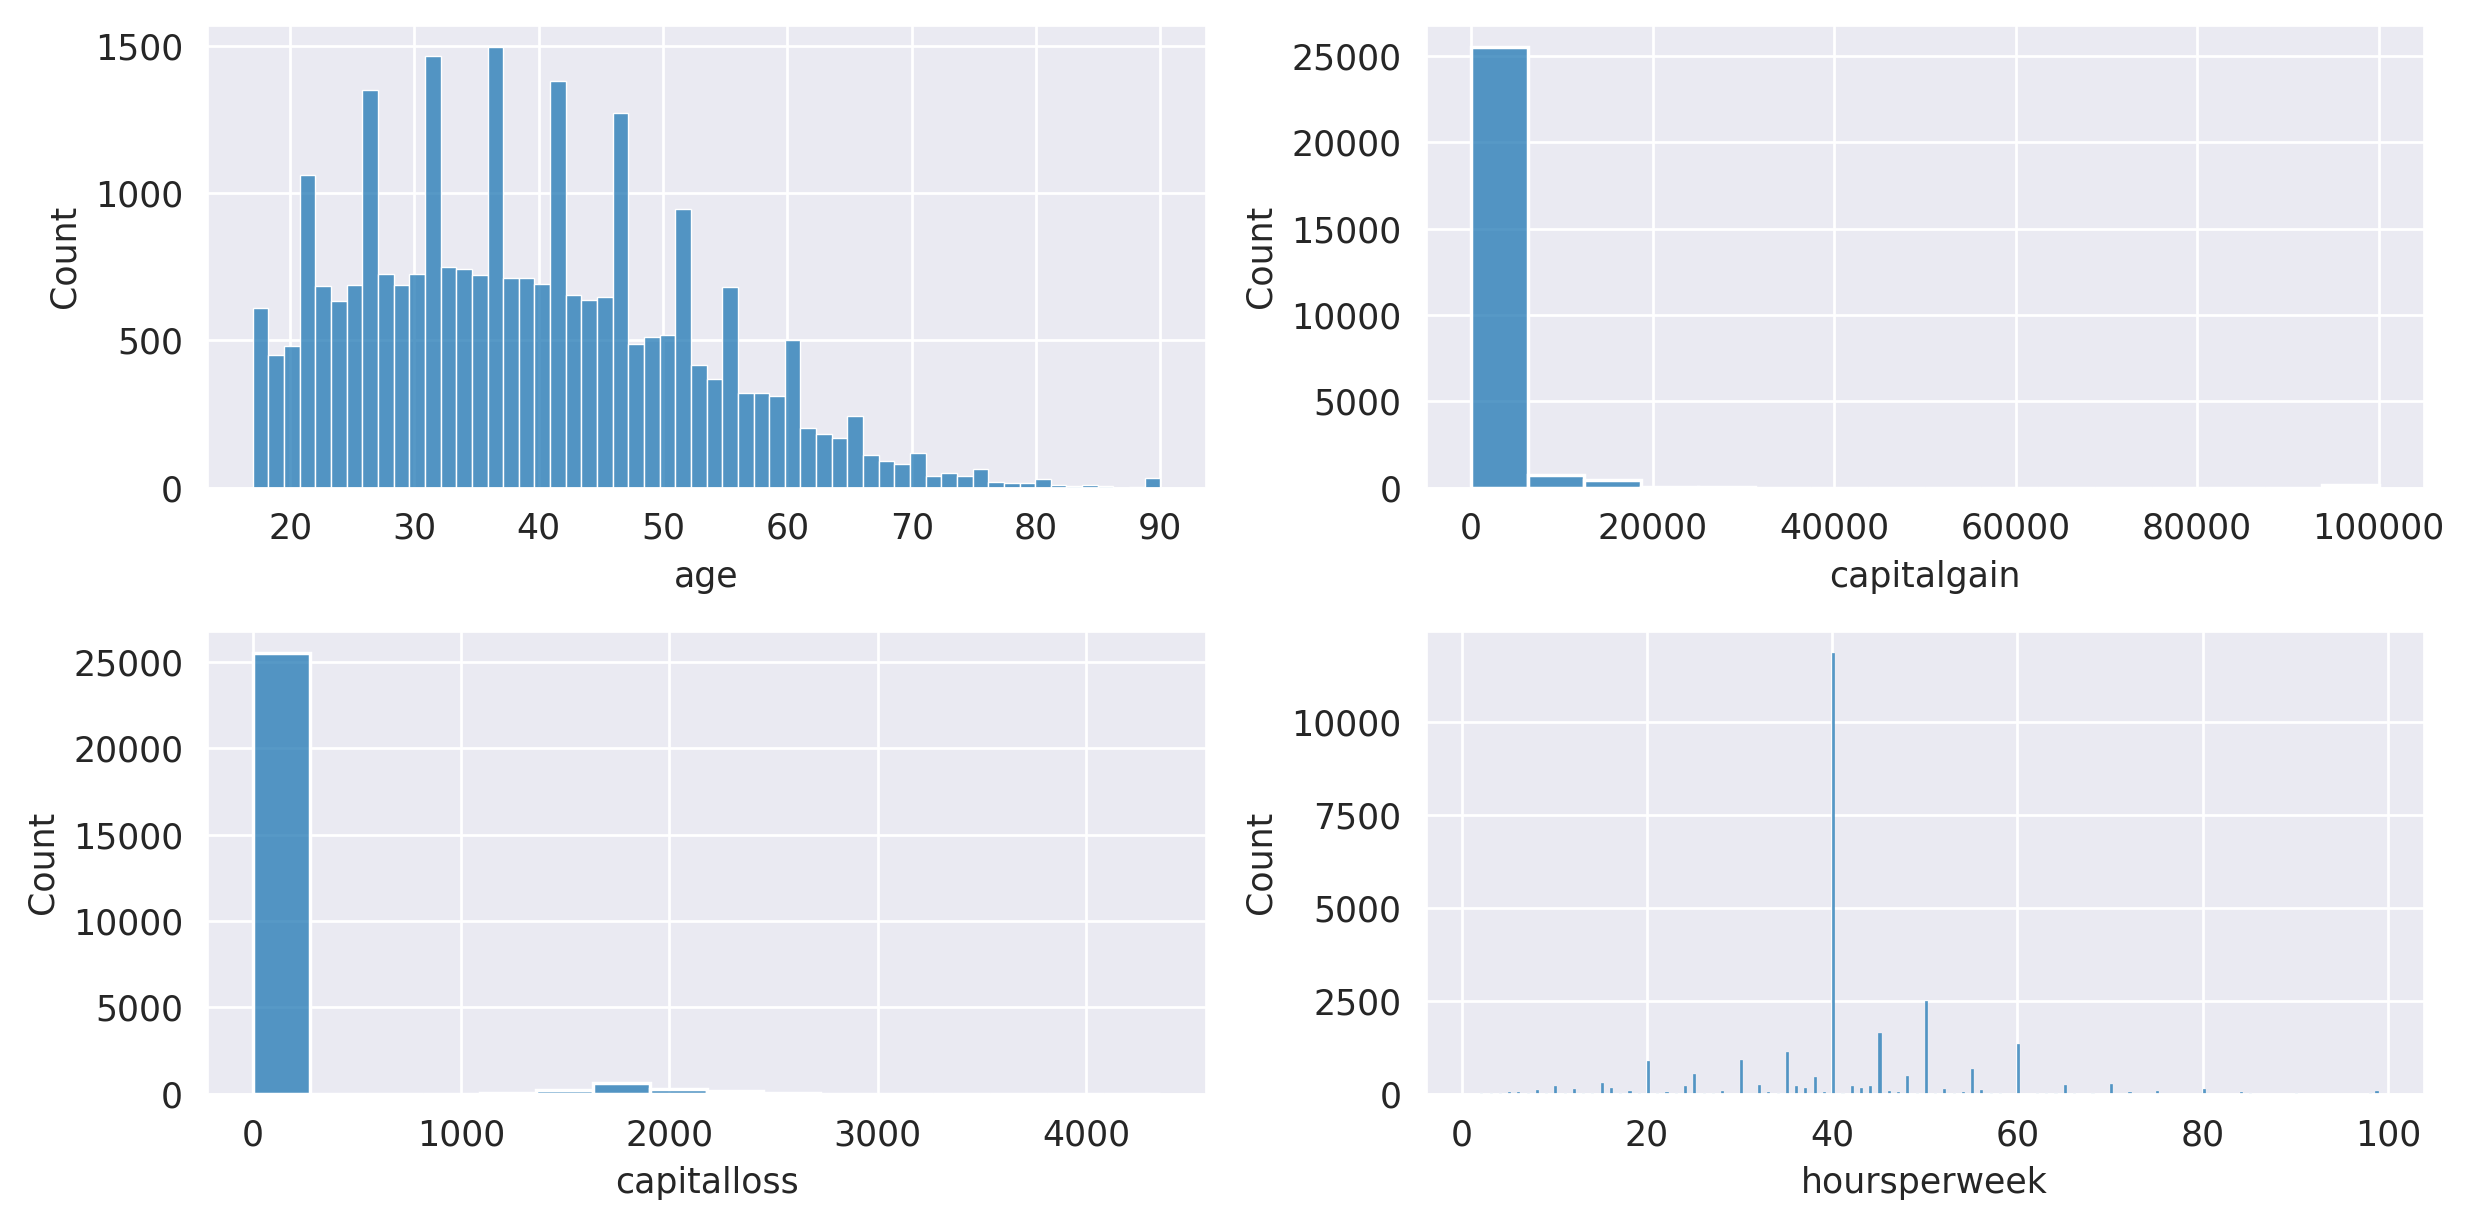

In [22]:
fig, ax=plt.subplots(2,2)

sns.histplot(sd_train['age'],ax=ax[0,0])
sns.histplot(sd_train['capitalgain'],ax=ax[0,1])
sns.histplot(sd_train['capitalloss'],ax=ax[1,0])
sns.histplot(sd_train['hoursperweek'],ax=ax[1,1])

plt.tight_layout()

QQ- plot

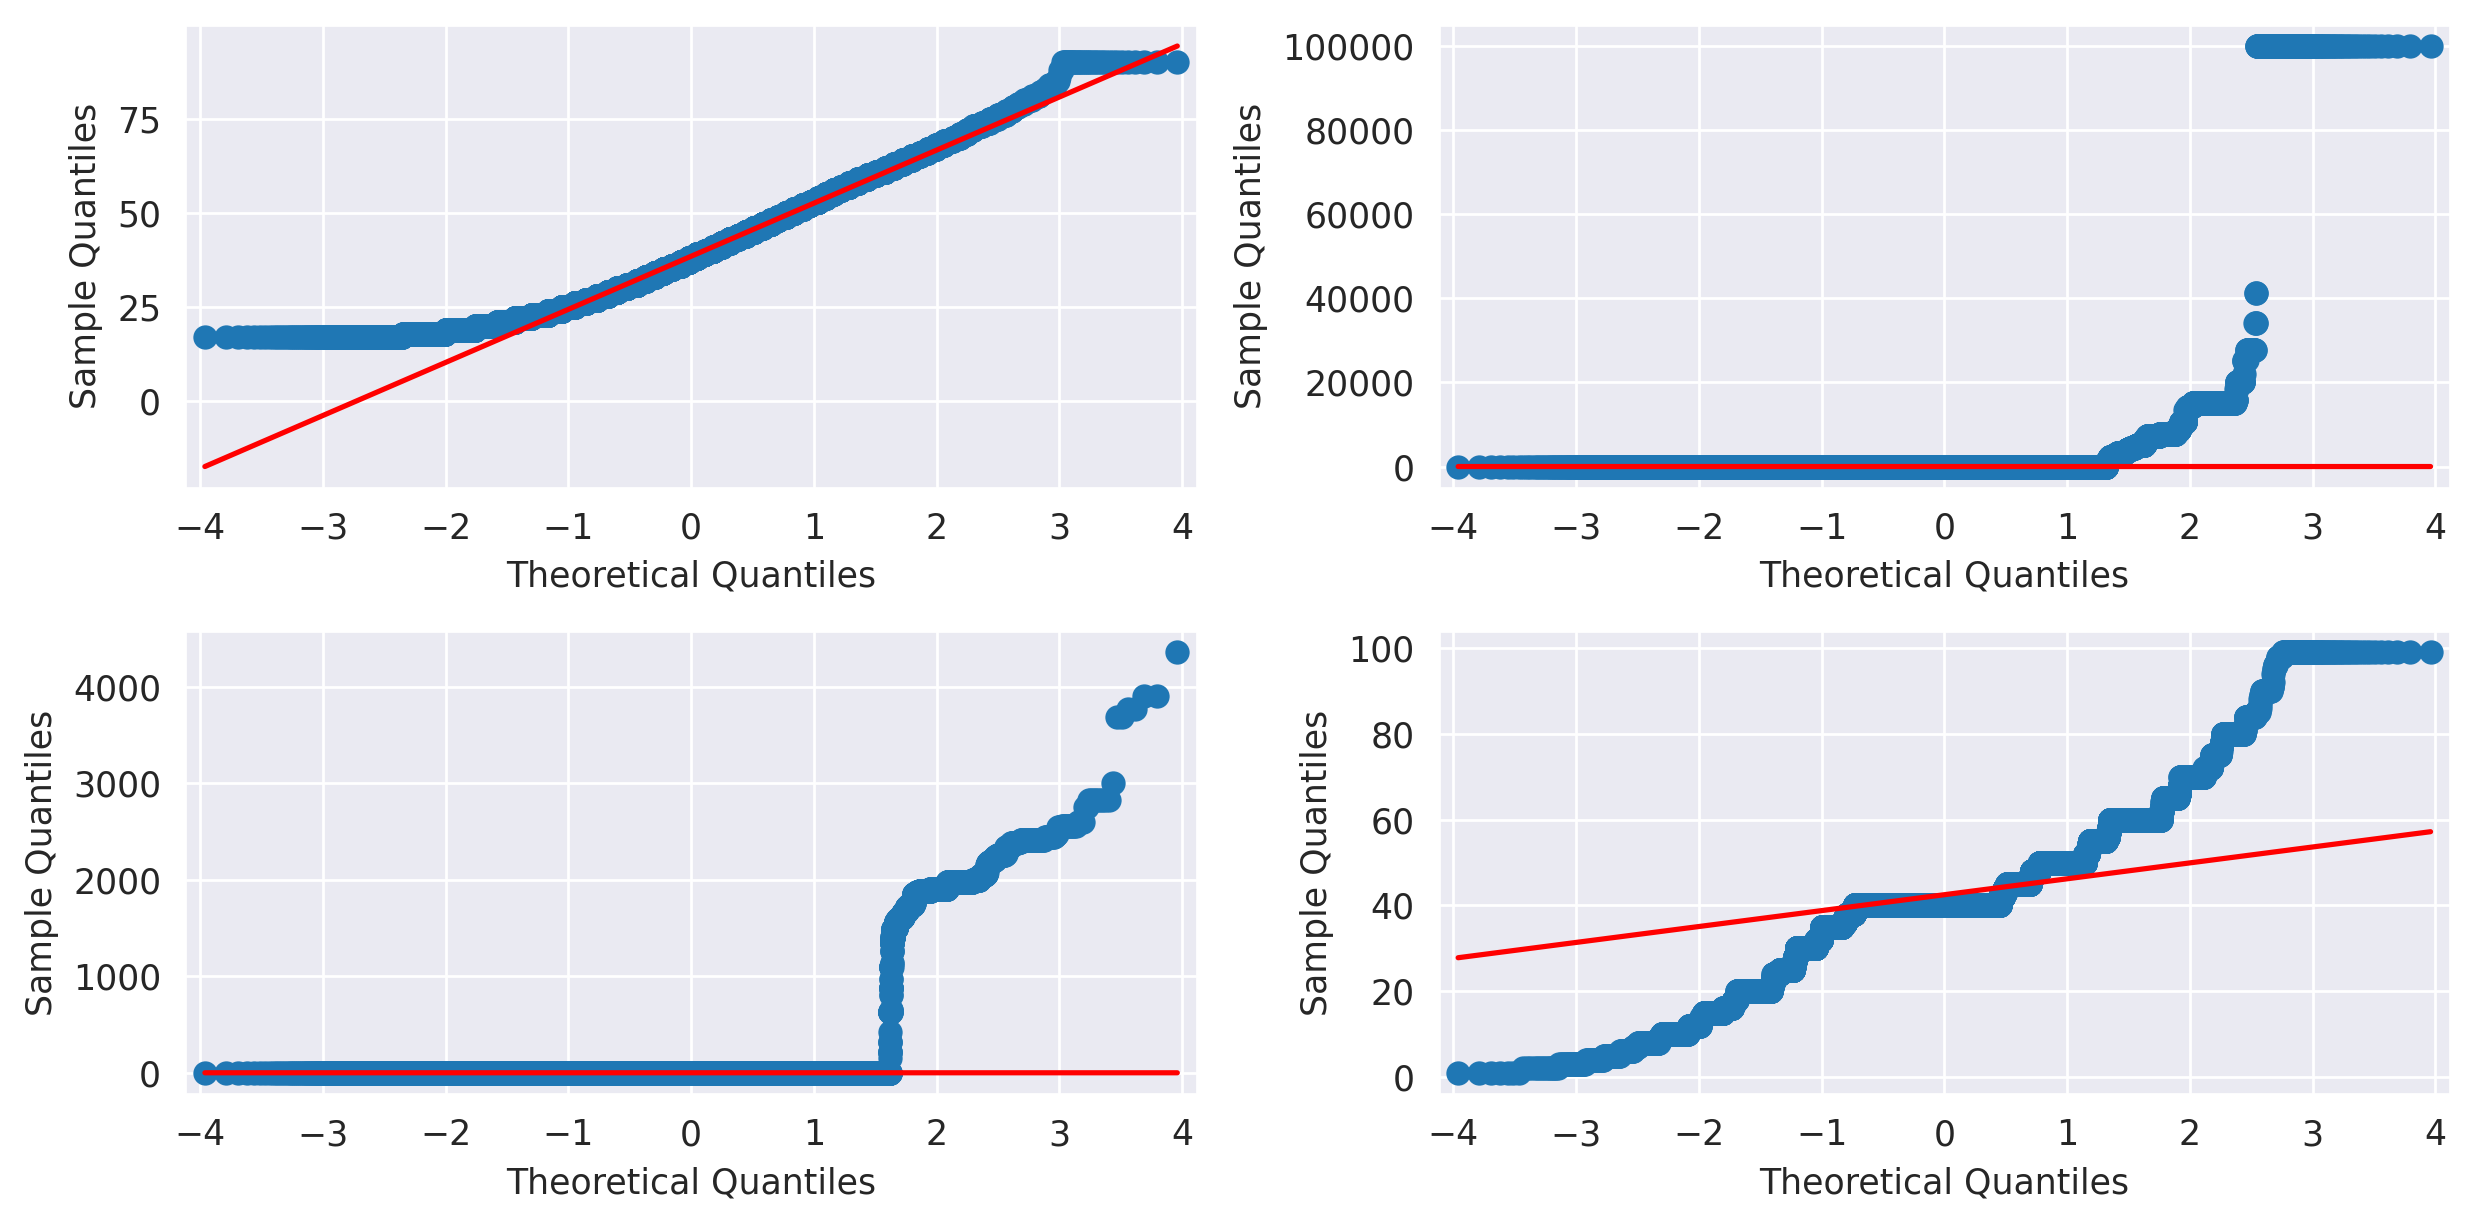

In [23]:
fig, ax=plt.subplots(2,2)

sm.qqplot(sd_train['age'],ax=ax[0,0], line='q')
sm.qqplot(sd_train['capitalgain'],ax=ax[0,1], line='q')
sm.qqplot(sd_train['capitalloss'],ax=ax[1,0], line='q')
sm.qqplot(sd_train['hoursperweek'],ax=ax[1,1], line='q')

plt.tight_layout()

# Converting categorical data to numerical data
 converting independent column using get dummies

In [24]:
le =LabelEncoder()

sd_train_gd=pd.get_dummies(sd_train,columns=['workclass','education','educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'])
sd_train_gd['Salary'] = le.fit_transform(sd_train_gd['Salary'])

sd_train_gd

,age,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,0,0,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26899,22,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26900,27,0,0,38,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26901,58,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Performing EDA in Test Dataset

In [25]:
sd_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [26]:
sd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [27]:
sd_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [28]:
def uni(df):

   for i in range(len(df.columns)):
     print('\n All Unique Value in ' + str(df.columns[i]))
     print(np.sort(df[df.columns[i]].unique()))
     print('Total no of unique values' +
        str(len(df[df.columns[i]].unique())))






In [29]:
uni(sd_test)


 All Unique Value in age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89
 90]
Total no of unique values73

 All Unique Value in workclass
[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
Total no of unique values7

 All Unique Value in education
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
Total no of unique values16

 All Unique Value in educationno
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Total no of unique values16

 All Unique Value in maritalstatus
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
Total no of unique values7

 All Uniqu

Checking Duplicated Values

In [30]:
sd_test[sd_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [31]:
sd_test.drop_duplicates(inplace=True)

In [32]:
sd_test[sd_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [33]:
sd_test.reset_index(inplace=True)
sd_test.drop(columns='index', inplace=True)

sd_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
14126,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
14127,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
14128,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Ploting Boxplot

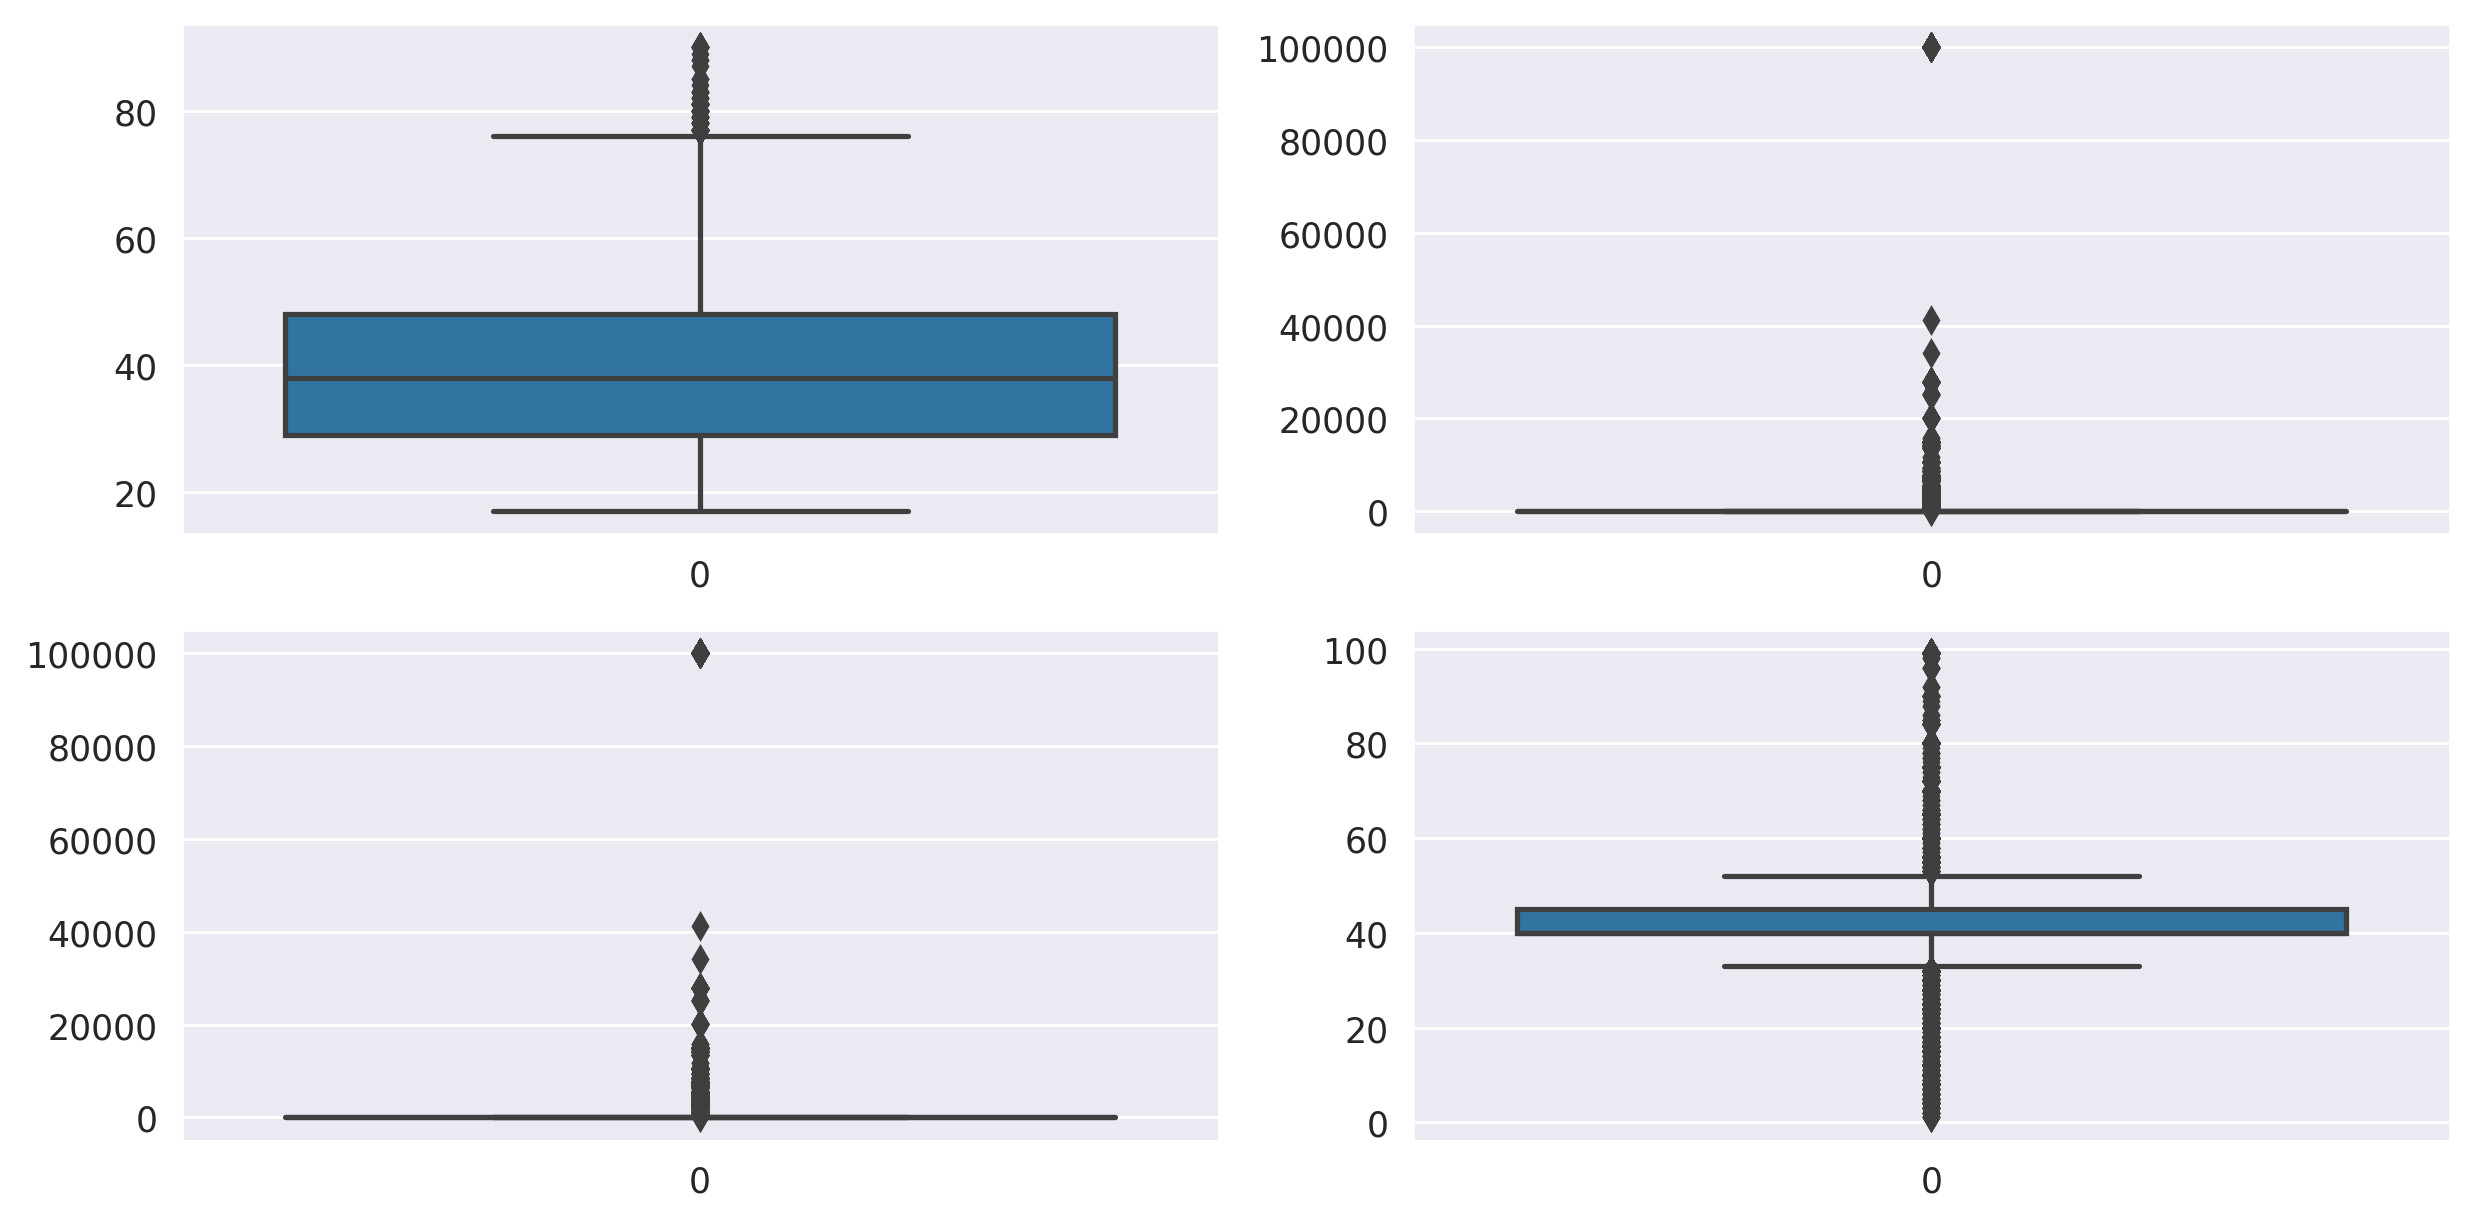

In [34]:
fig, ax=plt.subplots(2,2)

sns.boxplot(sd_test['age'], ax=ax[0,0])
sns.boxplot(sd_test['capitalgain'],ax=ax[0,1])
sns.boxplot(sd_test['capitalgain'],ax=ax[1,0])
sns.boxplot(sd_test['hoursperweek'],ax=ax[1,1])

plt.tight_layout()

# Ploting Histoplot

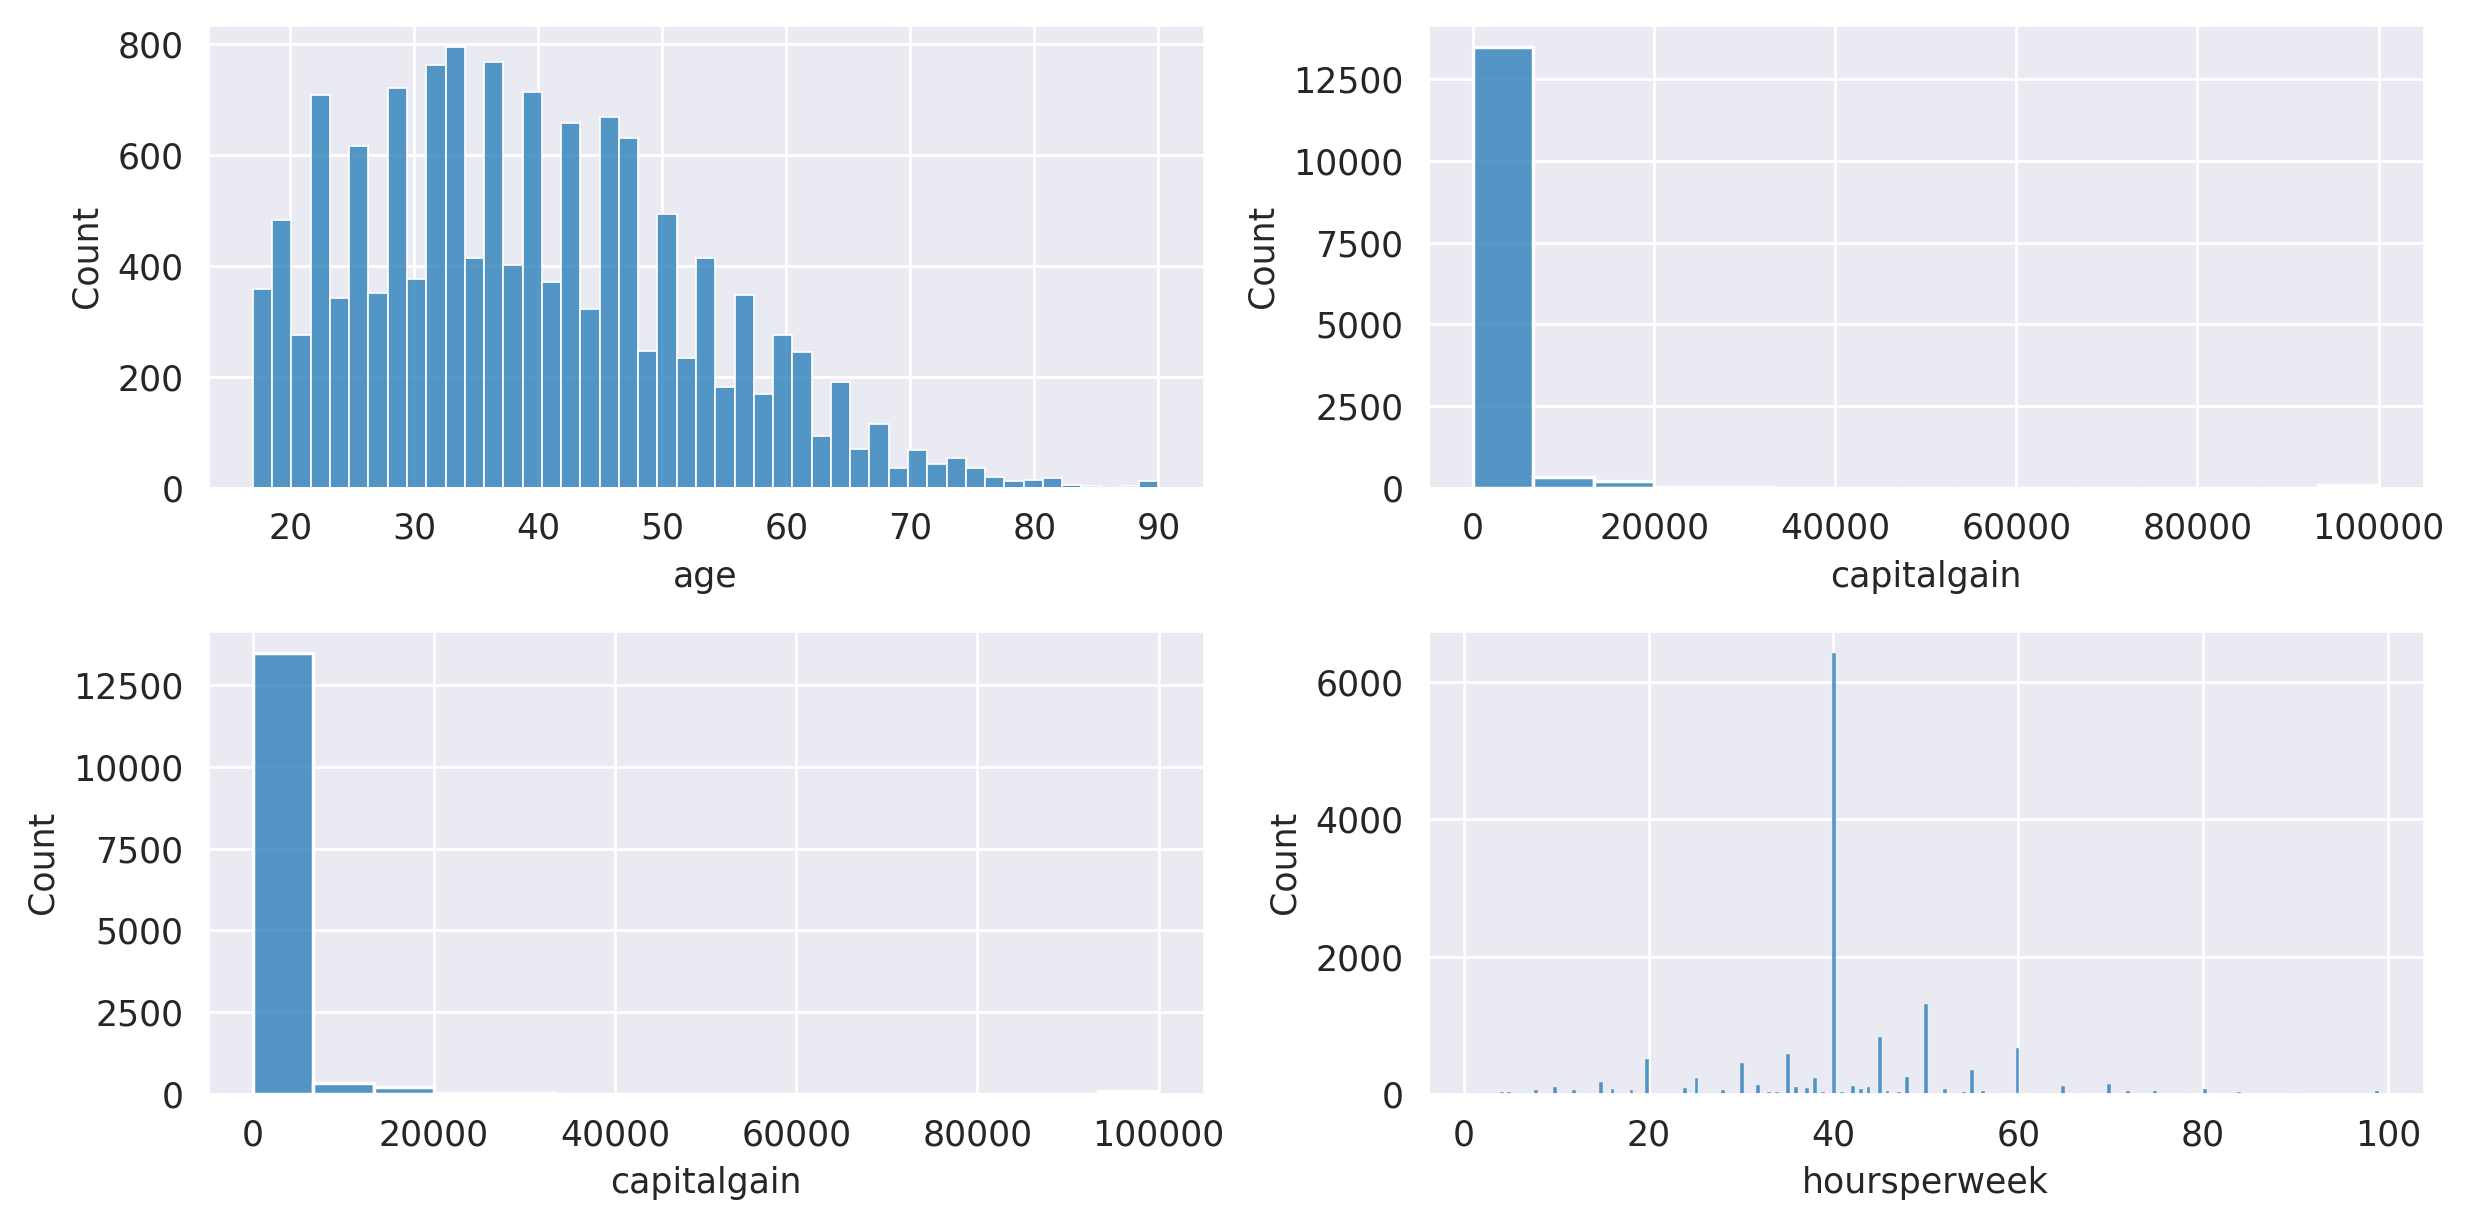

In [35]:
fig, ax=plt.subplots(2,2)

sns.histplot(sd_test['age'], ax=ax[0,0])
sns.histplot(sd_test['capitalgain'],ax=ax[0,1])
sns.histplot(sd_test['capitalgain'],ax=ax[1,0])
sns.histplot(sd_test['hoursperweek'],ax=ax[1,1])

plt.tight_layout()

# QQ-ploting

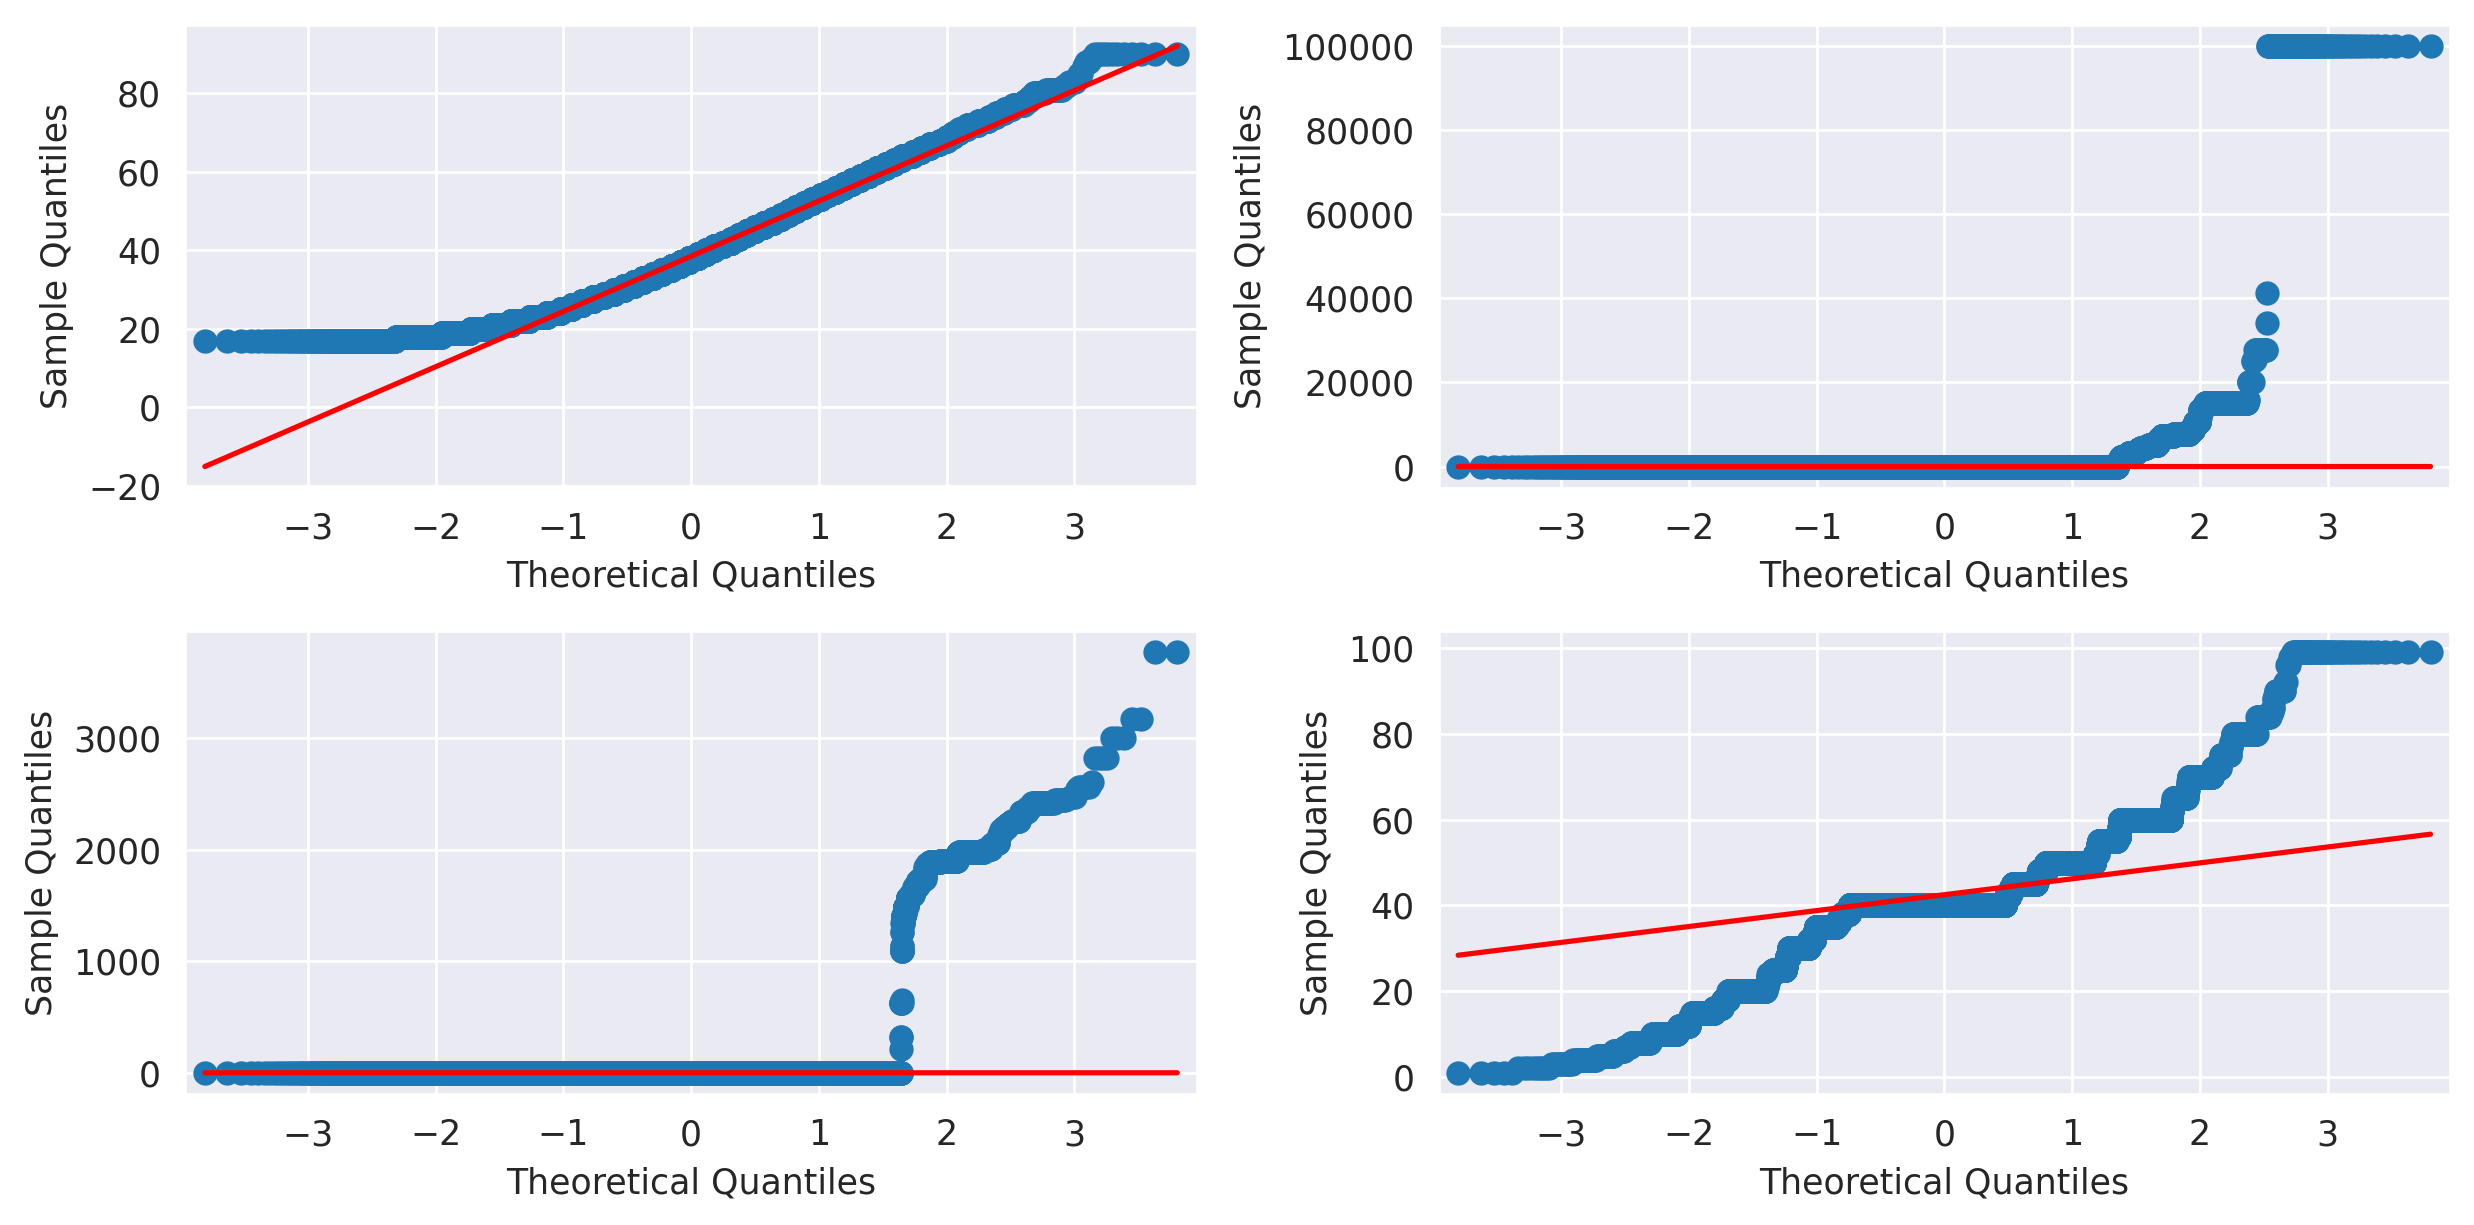

In [36]:
fig, ax=plt.subplots(2,2)

sm.qqplot(sd_test['age'],ax=ax[0,0], line='q')
sm.qqplot(sd_test['capitalgain'],ax=ax[0,1], line='q')
sm.qqplot(sd_test['capitalloss'],ax=ax[1,0], line='q')
sm.qqplot(sd_test['hoursperweek'],ax=ax[1,1], line='q')

plt.tight_layout()

# Converting Categorical Data to Numerical Data
# Converting Independent Column using Get Dummies

In [37]:
le =LabelEncoder()

sd_test_gd=pd.get_dummies(sd_test,columns=['workclass','education','educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'])
sd_test_gd['Salary'] = le.fit_transform(sd_test_gd['Salary'])

sd_test_gd

,age,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,7688,0,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,0,0,30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
14126,39,0,0,36,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
14127,38,0,0,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
14128,44,5455,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the Data into target and independent set

In [38]:
xtrain=sd_train_gd.drop(columns='Salary')
xtest = sd_test_gd.drop(columns='Salary')
ytrain=sd_train_gd['Salary']
ytest=sd_test_gd['Salary']

In [39]:
xtrain

,age,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,2174,0,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26899,22,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26900,27,0,0,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26901,58,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
xtest

,age,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,7688,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,0,0,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14126,39,0,0,36,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14127,38,0,0,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14128,44,5455,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Preparing Model From The Dataset
Creating Model with Naive Bayes



In [41]:
model_def=MultinomialNB()
model_def.fit(xtrain,ytrain)
ypred=model_def.predict(xtest)

# Evaluating the model

In [42]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     10620
           1       0.62      0.22      0.33      3510

    accuracy                           0.77     14130
   macro avg       0.71      0.59      0.60     14130
weighted avg       0.75      0.77      0.73     14130



# Comparing Training and testing Accuracy

In [43]:
print('Training Accuracy of are Model is : ' +  str(model_def.score(xtrain,ytrain)))
print('Testing Accuracy ofvare Model is : ' +str(model_def.score(xtest,ytest)))

Training Accuracy of are Model is : 0.7683158012117608
Testing Accuracy ofvare Model is : 0.7733899504600141
